In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [3]:
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None) 

In [4]:
sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate00.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate01.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate02.csv")
sdata3 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate10.csv")
sdata4 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate11.csv")
sdata5 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate12.csv")
sdata6 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate20.csv")
sdata7 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate21.csv")
sdata8 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate22.csv")

In [5]:
sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata3.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata4.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata5.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata6.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata7.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata8.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']

In [6]:
print(sdata.shape,
sdata1.shape,
sdata2.shape,
sdata3.shape,
sdata4.shape,
sdata5.shape,
sdata6.shape,
sdata7.shape,
sdata8.shape)


(2444, 6) (2774, 6) (3107, 6) (3440, 6) (3760, 6) (4090, 6) (4449, 6) (4772, 6) (5102, 6)


Exploratory Data Analysis

In [7]:
df = pd.concat([sdata, sdata1, sdata2, sdata3,sdata4, sdata5, sdata6, sdata7, sdata8], axis=0)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head(10000)

,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-07-22 05:10:50:003,-17.34,29.519999,-20.520000,27.942548,0
1,2020-07-22 05:10:50:022,-17.40,29.279999,-20.220000,27.751907,0
2,2020-07-22 05:10:50:042,-17.22,29.699999,-20.160000,27.610759,0
3,2020-07-22 05:10:50:062,-17.22,29.279999,-20.460000,27.815462,0
4,2020-07-22 05:10:50:082,-17.58,29.279999,-20.640000,28.171368,0
...,...,...,...,...,...,...
9995,2020-07-22 05:12:17:009,-16.14,29.880000,-22.920000,29.078961,10
9996,2020-07-22 05:12:17:028,-16.38,29.880000,-23.279999,29.496147,10
9997,2020-07-22 05:12:17:048,-17.10,30.000000,-23.640000,30.187075,10
9998,2020-07-22 05:12:17:068,-17.40,30.000000,-23.640000,30.358022,10


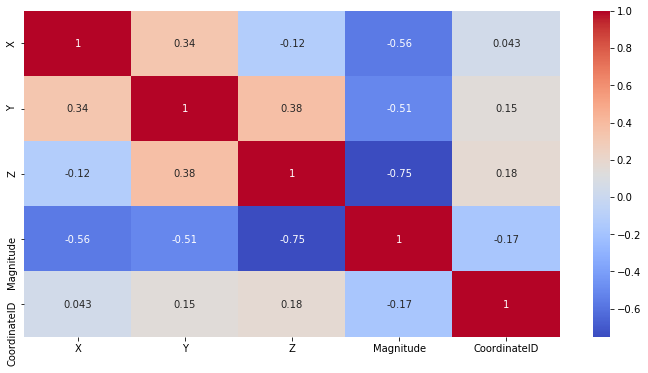

In [8]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

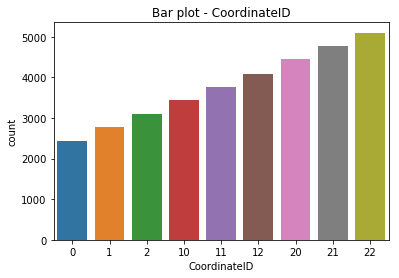

In [88]:
ax = sns.countplot(df['CoordinateID'])
plt.title('Bar plot - CoordinateID')
plt.show()

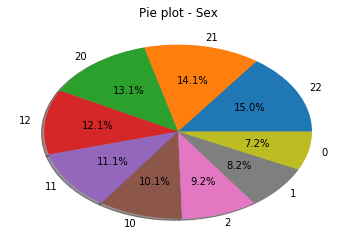

In [13]:
counts = df.CoordinateID.value_counts()
plt.pie(counts, autopct='%1.1f%%',
        labels=counts.index, shadow=True)
plt.title('Pie plot - Sex')
plt.show()

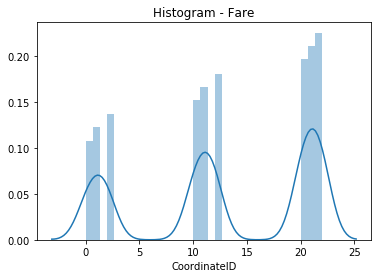

In [14]:
sns.distplot(df.CoordinateID)
plt.title('Histogram - Fare')
plt.show()

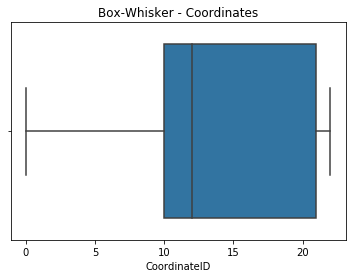

In [16]:
sns.boxplot(df.CoordinateID)
plt.title('Box-Whisker - Coordinates')
plt.show()

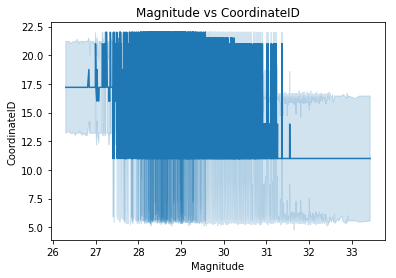

In [17]:
sns.lineplot(x=df.Magnitude, y=df.CoordinateID)
plt.title('Magnitude vs CoordinateID')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33938 entries, 0 to 33937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeStamp     33938 non-null  object 
 1   X             33938 non-null  float64
 2   Y             33938 non-null  float64
 3   Z             33938 non-null  float64
 4   Magnitude     33938 non-null  float64
 5   CoordinateID  33938 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [19]:
df.describe()

,X,Y,Z,Magnitude,CoordinateID
count,33938.000000,33938.000000,33938.000000,33938.000000,33938.000000
mean,-19.432219,28.383776,-21.285192,29.830513,12.825270
std,1.342536,1.098319,1.503288,1.280910,8.004043
min,-23.100000,25.019999,-25.320000,26.300540,0.000000
25%,-20.520000,27.660000,-22.560000,28.848355,10.000000
50%,-19.500000,28.260000,-21.060000,29.773443,12.000000
75%,-18.480000,29.160000,-20.160000,30.727302,21.000000
max,-15.360000,31.920000,-17.580000,33.433283,22.000000


### As shown by the visualizations, the data is imbalanced. So to deal with imbalanced dataset we can try Resampling, Oversampling and many other methods

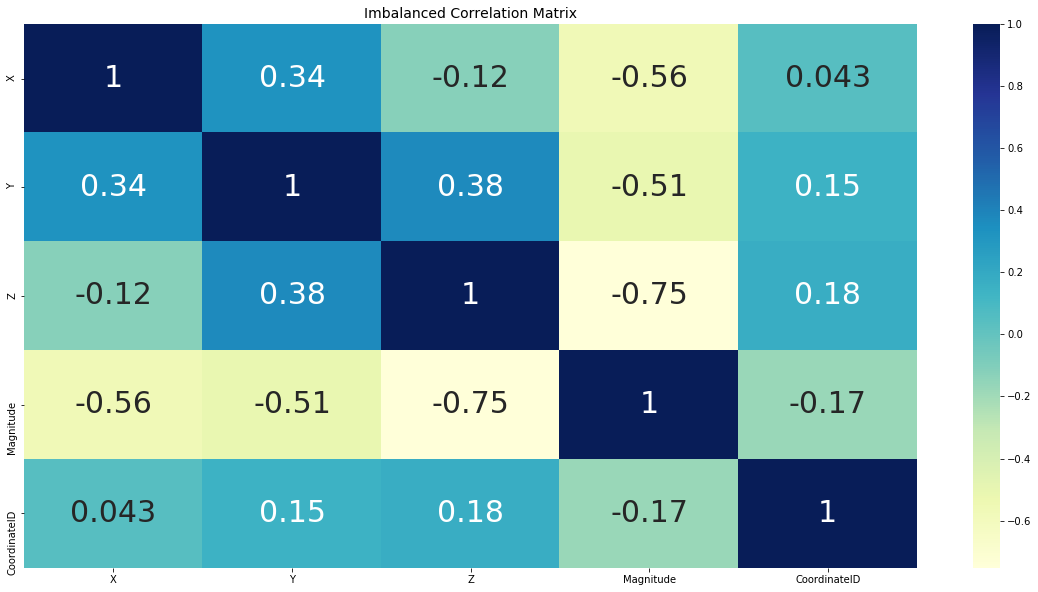

In [21]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax, annot = True)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [51]:
shuffled_df = df.sample(frac=1,random_state=4)

coord_df = shuffled_df.loc[shuffled_df['CoordinateID'] == 22]

non_fraud_df = shuffled_df.loc[shuffled_df['CoordinateID'] == 0].sample(n=5000,random_state=42, replace=True)
normalized_df = pd.concat([coord_df, non_fraud_df])

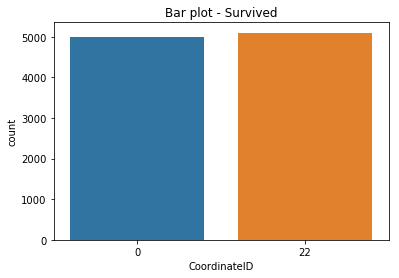

In [52]:
ax = sns.countplot(normalized_df['CoordinateID'])
plt.title('Bar plot - Survived')
plt.show()

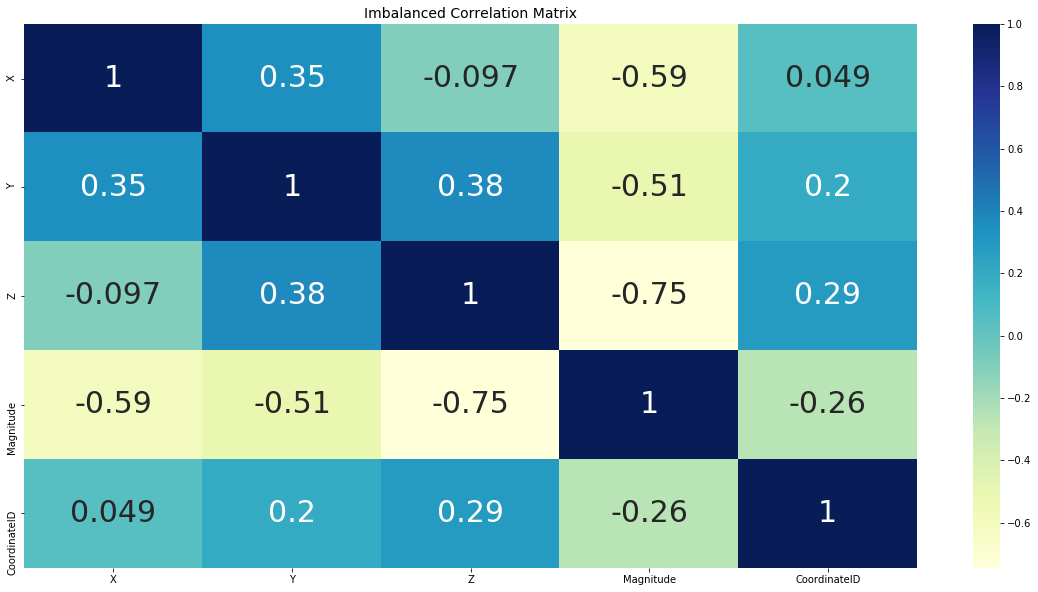

In [54]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax, annot = True)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [94]:
normalized_df.head()

,TimeStamp,X,Y,Z,Magnitude,CoordinateID
32641,2020-07-22 05:16:55:998,-16.740000,26.939999,-22.439999,28.942376,22
29551,2020-07-22 05:11:35:918,-21.600000,27.599998,-22.740000,32.231470,22
30152,2020-07-22 05:12:09:930,-20.279999,28.199999,-21.900000,30.778049,22
33286,2020-07-22 05:17:42:765,-19.439999,29.820000,-20.640000,29.386444,22
29884,2020-07-22 05:11:54:251,-19.619999,29.099998,-22.140000,30.550350,22


In [12]:
df.head(10000)

,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-07-22 05:10:50:003,-17.34,29.519999,-20.520000,27.942548,0
1,2020-07-22 05:10:50:022,-17.40,29.279999,-20.220000,27.751907,0
2,2020-07-22 05:10:50:042,-17.22,29.699999,-20.160000,27.610759,0
3,2020-07-22 05:10:50:062,-17.22,29.279999,-20.460000,27.815462,0
4,2020-07-22 05:10:50:082,-17.58,29.279999,-20.640000,28.171368,0
...,...,...,...,...,...,...
9995,2020-07-22 05:12:17:009,-16.14,29.880000,-22.920000,29.078961,10
9996,2020-07-22 05:12:17:028,-16.38,29.880000,-23.279999,29.496147,10
9997,2020-07-22 05:12:17:048,-17.10,30.000000,-23.640000,30.187075,10
9998,2020-07-22 05:12:17:068,-17.40,30.000000,-23.640000,30.358022,10


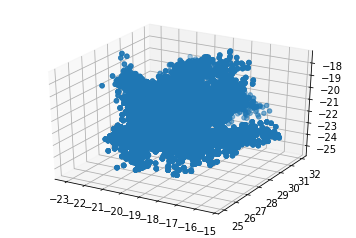

In [65]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
x, y, z = df['X'], df['Y'], df['Z']

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,z,)
plt.show()

In [14]:
df['X_rolling_avg'] = df.X.rolling(100).mean() 
df['Y_rolling_avg'] = df.Y.rolling(100).mean() 
df['Magn_rolling_avg'] = df.Magnitude.rolling(100).mean() 

In [35]:
grouper = df.groupby(['CoordinateID',df.reset_index().index // 100])

df['X_mean'] = grouper['X'].transform('mean')
df['Y_mean'] = grouper['Y'].transform('mean')
df['Z_mean'] = grouper['Z'].transform('mean')

new_df = grouper.agg(X_mean = ('X', 'mean'), 
                     Y_mean = ('Y', 'mean'),
                     Z_mean = ('Z', 'mean'),
                     mag_mean = ('Magnitude', 'mean'))

In [36]:
new_df

X_mean     Y_mean     Z_mean   mag_mean
CoordinateID                                                
0            0   -18.087000  28.823400 -20.743800  28.555537
             1   -18.370800  28.099800 -21.407400  29.220094
             2   -18.867600  27.093000 -21.903600  29.847360
             3   -19.766400  28.293000 -21.047400  29.852645
             4   -19.542000  28.279800 -20.700000  29.466536
...                     ...        ...        ...        ...
22           335 -19.507200  29.747400 -19.830000  28.877100
             336 -17.300400  30.107399 -21.124800  28.399242
             337 -17.884800  30.389999 -20.970000  28.645303
             338 -18.108600  30.191400 -20.847600  28.693820
             339 -19.100526  30.584210 -19.998947  28.755571

[348 rows x 4 columns]

In [45]:
grouper = df.groupby(['CoordinateID',df.reset_index().index // 100])
new_df1 = grouper.agg(X_mean = ('X', 'mean'), 
                     Y_mean = ('Y', 'mean'),
                     Z_mean = ('Z', 'mean'),
                     mag_mean = ('Magnitude', 'mean')).reset_index(level = 0)

In [50]:
new_df1

,CoordinateID,X_mean,Y_mean,Z_mean,mag_mean
0,0,-18.087000,28.823400,-20.743800,28.555537
1,0,-18.370800,28.099800,-21.407400,29.220094
2,0,-18.867600,27.093000,-21.903600,29.847360
3,0,-19.766400,28.293000,-21.047400,29.852645
4,0,-19.542000,28.279800,-20.700000,29.466536
...,...,...,...,...,...
335,22,-19.507200,29.747400,-19.830000,28.877100
336,22,-17.300400,30.107399,-21.124800,28.399242
337,22,-17.884800,30.389999,-20.970000,28.645303
338,22,-18.108600,30.191400,-20.847600,28.693820


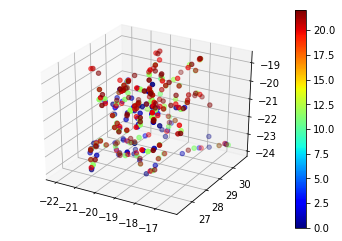

In [62]:
x, y, z = new_df1['X_mean'], new_df1['Y_mean'], new_df1['Z_mean']
c = new_df1['CoordinateID']
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
c

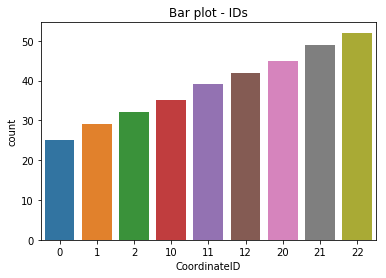

In [56]:
ax = sns.countplot(new_df1['CoordinateID'])
plt.title('Bar plot - IDs')
plt.show()

In [80]:
df = df.drop(['TimeStamp'], axis = 1) 

In [81]:
df

,X,Y,Z,Magnitude,CoordinateID,X_rolling_avg,Y_rolling_avg,Magn_rolling_avg,X_mean,Y_mean,Z_mean
0,-17.34,29.519999,-20.520000,27.942548,0,NaN,NaN,NaN,-18.087000,28.82340,-20.743800
1,-17.40,29.279999,-20.220000,27.751907,0,NaN,NaN,NaN,-18.087000,28.82340,-20.743800
2,-17.22,29.699999,-20.160000,27.610759,0,NaN,NaN,NaN,-18.087000,28.82340,-20.743800
3,-17.22,29.279999,-20.460000,27.815462,0,NaN,NaN,NaN,-18.087000,28.82340,-20.743800
4,-17.58,29.279999,-20.640000,28.171368,0,NaN,NaN,NaN,-18.087000,28.82340,-20.743800
...,...,...,...,...,...,...,...,...,...,...,...
33933,-19.32,30.300000,-20.340000,29.113193,22,-18.5604,30.3048,28.728140,-19.100526,30.58421,-19.998947
33934,-18.96,30.000000,-20.939999,29.291041,22,-18.5706,30.3000,28.737089,-19.100526,30.58421,-19.998947
33935,-19.26,29.820000,-20.939999,29.480013,22,-18.5820,30.2940,28.746375,-19.100526,30.58421,-19.998947
33936,-18.84,29.580000,-21.060000,29.285307,22,-18.5910,30.2826,28.753875,-19.100526,30.58421,-19.998947


In [84]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['X', 'Y', 'Z']]  # Features
y=df['CoordinateID']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) 

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23756, 3) (10182, 3) (23756,) (10182,)


In [86]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42, class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [87]:
 clf.score(X_train,y_train)

0.2089577369927597

In [78]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.07729579309215912


In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.013553329404832056


In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.01227656648988411


In [70]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.013847967000589274


In [21]:
preds =  clf.predict(X_test)

In [22]:
preds.shape

(10182,)

In [23]:
#df1 = pd.DataFrame({'Predictions': preds})

In [24]:
#df = pd.concat([df, df1], axis=1)

In [25]:
#df.tail(25000)

## Neural 

In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [67]:
new_df1.columns = [['CoordinateID', 'X', 'Y', 'Z', 'Magnitude']]

In [68]:
new_df1

,CoordinateID,X,Y,Z,Magnitude
0,0,-18.087000,28.823400,-20.743800,28.555537
1,0,-18.370800,28.099800,-21.407400,29.220094
2,0,-18.867600,27.093000,-21.903600,29.847360
3,0,-19.766400,28.293000,-21.047400,29.852645
4,0,-19.542000,28.279800,-20.700000,29.466536
...,...,...,...,...,...
335,22,-19.507200,29.747400,-19.830000,28.877100
336,22,-17.300400,30.107399,-21.124800,28.399242
337,22,-17.884800,30.389999,-20.970000,28.645303
338,22,-18.108600,30.191400,-20.847600,28.693820


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33938 entries, 0 to 33937
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 33938 non-null  float64
 1   Y                 33938 non-null  float64
 2   Z                 33938 non-null  float64
 3   Magnitude         33938 non-null  float64
 4   CoordinateID      33938 non-null  int64  
 5   X_rolling_avg     33839 non-null  float64
 6   Y_rolling_avg     33839 non-null  float64
 7   Magn_rolling_avg  33839 non-null  float64
 8   X_mean            33938 non-null  float64
 9   Y_mean            33938 non-null  float64
 10  Z_mean            33938 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB


In [82]:
# Select Features
train_df = df.iloc[:,0:5]
train_df

,X,Y,Z,Magnitude,CoordinateID
0,-17.34,29.519999,-20.520000,27.942548,0
1,-17.40,29.279999,-20.220000,27.751907,0
2,-17.22,29.699999,-20.160000,27.610759,0
3,-17.22,29.279999,-20.460000,27.815462,0
4,-17.58,29.279999,-20.640000,28.171368,0
...,...,...,...,...,...
33933,-19.32,30.300000,-20.340000,29.113193,22
33934,-18.96,30.000000,-20.939999,29.291041,22
33935,-19.26,29.820000,-20.939999,29.480013,22
33936,-18.84,29.580000,-21.060000,29.285307,22


In [83]:
train_AP_strengths = train_df[['X', 'Y', 'Z', 'Magnitude']]
train_AP_strengths

,X,Y,Z,Magnitude
0,-17.34,29.519999,-20.520000,27.942548
1,-17.40,29.279999,-20.220000,27.751907
2,-17.22,29.699999,-20.160000,27.610759
3,-17.22,29.279999,-20.460000,27.815462
4,-17.58,29.279999,-20.640000,28.171368
...,...,...,...,...
33933,-19.32,30.300000,-20.340000,29.113193
33934,-18.96,30.000000,-20.939999,29.291041
33935,-19.26,29.820000,-20.939999,29.480013
33936,-18.84,29.580000,-21.060000,29.285307


In [84]:
#Scale transforms data to center to the mean and component wise scale to unit variance
train_AP_features = scale(np.asarray(train_AP_strengths))

In [85]:
#Convert coordinates to  a string
coordinates = train_df['CoordinateID'].map(str)
train_labels = np.asarray(coordinates)

In [74]:
train_labels.shape

NameError: name 'train_labels' is not defined

In [85]:
#convert labels to categorical variables, dummy_labels has type 'pandas.core.frame.DataFrame'
dummy_labels = pd.get_dummies(train_labels)
dummy_labels

,0,1,10,11,12,2,20,21,22
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
33933,0,0,0,0,0,0,0,0,1
33934,0,0,0,0,0,0,0,0,1
33935,0,0,0,0,0,0,0,0,1
33936,0,0,0,0,0,0,0,0,1


In [89]:
train_labels = np.asarray(dummy_labels) #labels is an array of shape 19937 x 13.
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [90]:
#generate len(train_AP_features) of floats in between 0 and 1
train_val_split = np.random.rand(len(train_AP_features))
#convert train_val_split to an array of booleans: if elem < 0.7 = true, else: false
train_val_split = train_val_split < 0.70 #should contain ~70% percent true

In [91]:
train_X = train_AP_features[train_val_split]
train_y = train_labels[train_val_split]
val_X = train_AP_features[~train_val_split]
val_y = train_labels[~train_val_split]

In [92]:
train_X.shape

(23787, 4)

In [99]:
nb_epochs = 30
batch_size = 1024
input_size = 4
num_classes = 9 #Total nine coordinates

In [100]:
def encoder():
    model = Sequential()
    model.add(Dense(256, input_dim=input_size, activation='tanh', bias=True))
    model.add(Dense(128, activation='tanh', bias=True))
    model.add(Dense(64, activation='tanh', bias=True))
    return model

In [101]:
def decoder(e):   
    e.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    e.add(Dense(256, activation='tanh', bias=True))
    e.add(Dense(input_size, activation='tanh', bias=True))
    e.compile(optimizer='adam', loss='mse')
    return e

In [102]:
e = encoder()

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=4, activation="tanh", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  after removing the cwd from sys.path.
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="tanh", use_bias=True)`
  """


In [103]:
d = decoder(e)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="tanh", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="tanh", use_bias=True)`
  after removing the cwd from sys.path.


In [104]:
d.fit(train_X, train_X, nb_epoch=nb_epochs, batch_size=batch_size)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
23787/23787 [==============================] - 1s 49us/step - loss: 0.2365
Epoch 2/30
23787/23787 [==============================] - 1s 24us/step - loss: 0.1478
Epoch 3/30
23787/23787 [==============================] - 1s 27us/step - loss: 0.1414
Epoch 4/30
23787/23787 [==============================] - 1s 25us/step - loss: 0.1394
Epoch 5/30
23787/23787 [==============================] - 0s 20us/step - loss: 0.1383
Epoch 6/30
23787/23787 [==============================] - 1s 22us/step - loss: 0.1376
Epoch 7/30
23787/23787 [==============================] - 1s 21us/step - loss: 0.1371: 0s - loss: 0.136
Epoch 8/30
23787/23787 [==============================] - 1s 24us/step - loss: 0.1367
Epoch 9/30
23787/23787 [==============================] - 1s 29us/step - loss: 0.1364
Epoch 10/30
23787/23787 [==============================] - 1s 22us/step - loss: 0.1361: 0s - loss: 0.136
Epoch 11/30
23787/23787 [==============================] - 1s 30us/step - loss: 0.1358: 0s - loss: 
Epo

None


In [105]:
def classifier(d):
    num_to_remove = 3
    for i in range(num_to_remove):
        d.pop()
    d.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    d.add(Dense(128, activation='tanh', bias=True))
    d.add(Dense(num_classes, activation='softmax', bias=True))
    d.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return d

In [106]:
c = classifier(d)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  """
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="softmax", use_bias=True)`
  import sys


In [107]:
c.fit(train_X, train_y, validation_data=(val_X, val_y), nb_epoch=nb_epochs, batch_size=batch_size , shuffle = True)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 23787 samples, validate on 10151 samples
Epoch 1/30
23787/23787 [==============================] - 2s 72us/step - loss: 2.1605 - accuracy: 0.1437 - val_loss: 2.1478 - val_accuracy: 0.1451
Epoch 2/30
23787/23787 [==============================] - 1s 31us/step - loss: 2.1433 - accuracy: 0.1512 - val_loss: 2.1439 - val_accuracy: 0.1449
Epoch 3/30
23787/23787 [==============================] - 1s 27us/step - loss: 2.1365 - accuracy: 0.1475 - val_loss: 2.1409 - val_accuracy: 0.1452
Epoch 4/30
23787/23787 [==============================] - 1s 23us/step - loss: 2.1329 - accuracy: 0.1495 - val_loss: 2.1354 - val_accuracy: 0.1442
Epoch 5/30
23787/23787 [==============================] - 1s 26us/step - loss: 2.1299 - accuracy: 0.1495 - val_loss: 2.1391 - val_accuracy: 0.1468
Epoch 6/30
23787/23787 [==============================] - 1s 23us/step - loss: 2.1270 - accuracy: 0.1494 - val_loss: 2.1338 - val_accuracy: 0.1424
Epoch 7/30
23787/23787 [==============================] - 1s 25us/st

In [108]:
loss, acc = c.evaluate(train_AP_features, train_labels)
print(loss, acc)

33938/33938 [==============================] - 2s 53us/step
2.114992056027686 0.14944899082183838
